In [1]:
file = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\GOLD_DF_01.csv"

In [2]:
import pandas as pd
df = pd.read_csv(file)
df

isic_id  age_approx anatom_site_general     sex              label
0      ISIC_0000013          30     posterior torso  female  melanoma_invasive
1      ISIC_0000022          55     lower extremity  female   melanoma_in_situ
2      ISIC_0000026          30     lower extremity  female  melanoma_invasive
3      ISIC_0000030          55     lower extremity  female  melanoma_invasive
4      ISIC_0000031          70     upper extremity    male  melanoma_invasive
...             ...         ...                 ...     ...                ...
11751  ISIC_9961567          65      anterior torso    male              nevus
11752  ISIC_9963174          35      anterior torso  female              nevus
11753  ISIC_9965174          30      anterior torso  female              nevus
11754  ISIC_9997614          50     upper extremity  female              nevus
11755  ISIC_9998682          60           head/neck    male   melanoma_in_situ

[11756 rows x 5 columns]

In [3]:
df['label'].unique()

array(['melanoma_invasive', 'melanoma_in_situ', 'nevus'], dtype=object)

In [5]:
import pandas as pd
import os
import shutil

# Paths
meta_file = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\GOLD_DF_01.csv"
images_folder = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\melanoma & nevus dataset\images"
cleaned_dataset_folder = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset"

# Load metadata
df = pd.read_csv(meta_file)

# Target classes
target_classes = ['melanoma_invasive', 'melanoma_in_situ', 'nevus']
df = df[df['label'].isin(target_classes)]

# Make cleaned dataset directory and subfolders
os.makedirs(cleaned_dataset_folder, exist_ok=True)
for label in target_classes:
    os.makedirs(os.path.join(cleaned_dataset_folder, label), exist_ok=True)

# Copy images and keep track of new paths
new_paths = []
for idx, row in df.iterrows():
    image_name = f"{row['isic_id']}.jpg"
    src_path = os.path.join(images_folder, image_name)
    if os.path.exists(src_path):
        dest_path = os.path.join(cleaned_dataset_folder, row['label'], image_name)
        shutil.copy(src_path, dest_path)
        new_paths.append(dest_path)
    else:
        new_paths.append(None)

# Add new image paths to metadata
df['image_path'] = new_paths

# Keep only rows where images exist
df_cleaned = df[df['image_path'].notnull()]

# Save cleaned metadata CSV inside cleaned_dataset
metadata_csv = os.path.join(cleaned_dataset_folder, 'metadata.csv')
df_cleaned.to_csv(metadata_csv, index=False)

print(f"✅ Cleaned dataset created at: {cleaned_dataset_folder}")
print(f"Metadata CSV saved at: {metadata_csv}")
print("Number of images per class:")
print(df_cleaned['label'].value_counts())


✅ Cleaned dataset created at: C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset
Metadata CSV saved at: C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset\metadata.csv
Number of images per class:
label
nevus                9976
melanoma_in_situ      983
melanoma_invasive     797
Name: count, dtype: int64


In [7]:
import pandas as pd
import os
import shutil

# Paths
cleaned_dataset_folder = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset"
metadata_csv = os.path.join(cleaned_dataset_folder, 'metadata.csv')

# Load the cleaned metadata
df_cleaned = pd.read_csv(metadata_csv)

# Target classes
target_classes = ['melanoma_invasive', 'melanoma_in_situ', 'nevus']

# Process each class
for label in target_classes:
    class_folder = os.path.join(cleaned_dataset_folder, label)
    df_class = df_cleaned[df_cleaned['label'] == label].copy()
    
    for idx, (_, row) in enumerate(df_class.iterrows(), start=1):
        new_filename = f"{idx:04d}.jpg"  # sequential filenames
        old_path = row['image_path']
        new_path = os.path.join(class_folder, new_filename)
        
        # Rename/move the file
        os.rename(old_path, new_path)
        
        # Update metadata
        df_cleaned.loc[row.name, 'image_path'] = new_path
        df_cleaned.loc[row.name, 'isic_id'] = new_filename.split('.')[0]

# Save updated metadata
df_cleaned.to_csv(metadata_csv, index=False)

print("✅ Images renamed sequentially and metadata updated successfully.")


✅ Images renamed sequentially and metadata updated successfully.


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isic_id              11756 non-null  object
 1   age_approx           11756 non-null  int64 
 2   anatom_site_general  11756 non-null  object
 3   sex                  11756 non-null  object
 4   label                11756 non-null  object
 5   image_path           11756 non-null  object
dtypes: int64(1), object(5)
memory usage: 551.2+ KB


In [12]:
# Check if all values in isic_id are digits
if df_cleaned['isic_id'].str.isdigit().all():
    print("All `isic_id` values are numeric. Converting to integer type...")
    df_cleaned['isic_id'] = df_cleaned['isic_id'].astype(int)
else:
    print("Some `isic_id` values contain non-numeric characters. Keeping as string.")

# Save the updated metadata
df_cleaned.to_csv(metadata_csv, index=False)

# Check result
print(df_cleaned.dtypes)
print(df_cleaned.head())


All `isic_id` values are numeric. Converting to integer type...
isic_id                 int32
age_approx              int64
anatom_site_general    object
sex                    object
label                  object
image_path             object
dtype: object
   isic_id  age_approx anatom_site_general     sex              label  \
0        1          30     posterior torso  female  melanoma_invasive   
1        1          55     lower extremity  female   melanoma_in_situ   
2        2          30     lower extremity  female  melanoma_invasive   
3        3          55     lower extremity  female  melanoma_invasive   
4        4          70     upper extremity    male  melanoma_invasive   

                                          image_path  
0  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  
1  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  
2  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  
3  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  
4  C:\Users\lenovo\OneDrive\

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isic_id              11756 non-null  int32 
 1   age_approx           11756 non-null  int64 
 2   anatom_site_general  11756 non-null  object
 3   sex                  11756 non-null  object
 4   label                11756 non-null  object
 5   image_path           11756 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 505.3+ KB


___

        "C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset"
        "C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset\melanoma_in_situ"
        "C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset\melanoma_invasive"
        "C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset\nevus"
        "C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset\metadata.csv"

### Class Distribution:

In [16]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import random

# Dataset folders
base_path = Path(r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset")
folders = {
    "melanoma_in_situ": base_path / "melanoma_in_situ",
    "melanoma_invasive": base_path / "melanoma_invasive",
    "nevus": base_path / "nevus"
}

# Collect image paths per class
image_paths = {cls: list(folder.glob("*")) for cls, folder in folders.items()}

# Count images per class
for cls, imgs in image_paths.items():
    print(f"{cls}: {len(imgs)} images")


melanoma_in_situ: 983 images
melanoma_invasive: 797 images
nevus: 9976 images


### Random Samples per Class

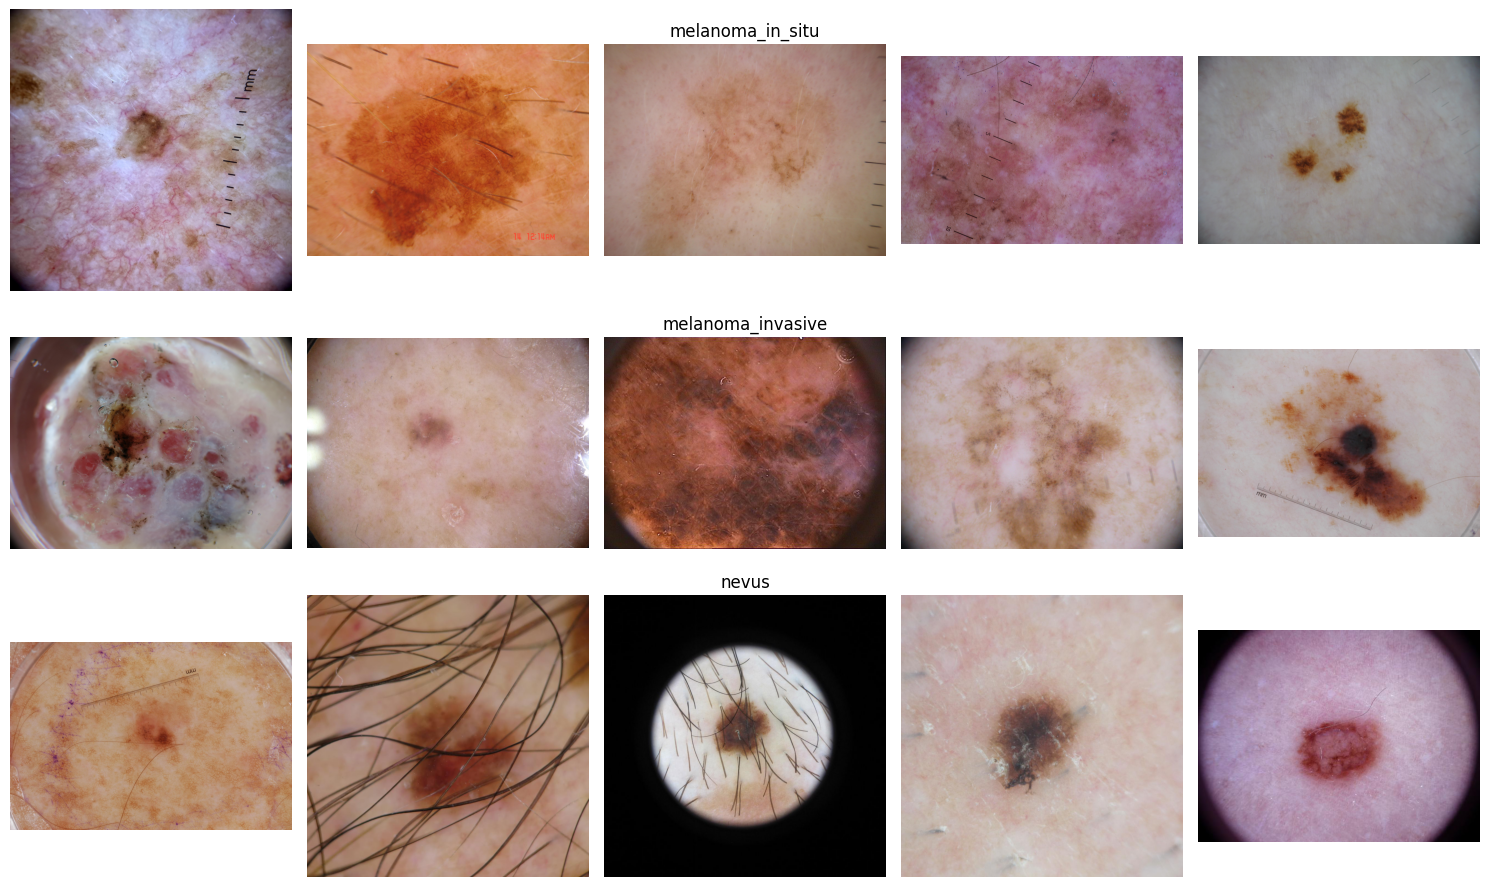

In [17]:
fig, axes = plt.subplots(len(folders), 5, figsize=(15,9))
for i, (cls, imgs) in enumerate(image_paths.items()):
    samples = random.sample(imgs, min(5, len(imgs)))
    for j, img_path in enumerate(samples):
        img = Image.open(img_path)
        axes[i,j].imshow(img)
        axes[i,j].axis('off')
        if j == 2:
            axes[i,j].set_title(cls)
plt.tight_layout()
plt.show()


### Image Sizes & Aspect Ratios

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


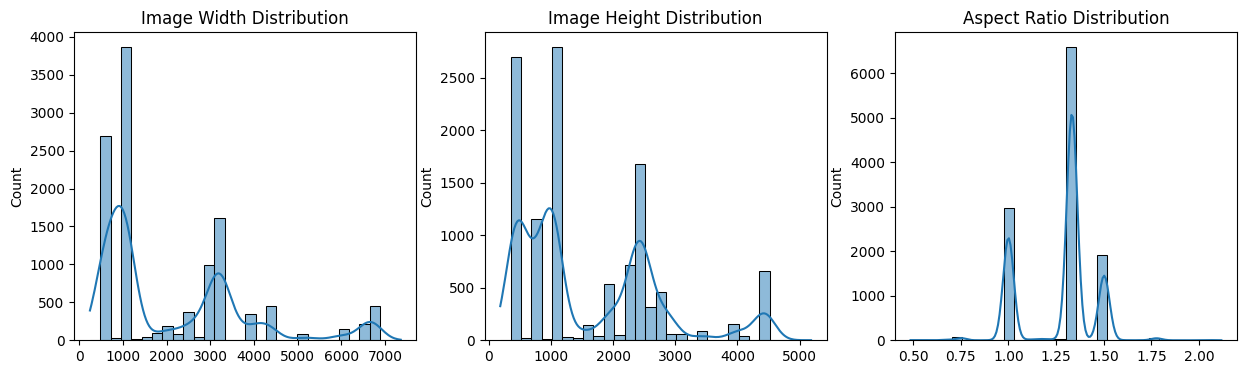

In [18]:
widths, heights, aspect_ratios = [], [], []

for imgs in image_paths.values():
    for img_path in imgs:
        img = Image.open(img_path)
        widths.append(img.width)
        heights.append(img.height)
        aspect_ratios.append(img.width/img.height)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(widths, bins=30, kde=True)
plt.title("Image Width Distribution")
plt.subplot(1,3,2)
sns.histplot(heights, bins=30, kde=True)
plt.title("Image Height Distribution")
plt.subplot(1,3,3)
sns.histplot(aspect_ratios, bins=30, kde=True)
plt.title("Aspect Ratio Distribution")
plt.show()


### Color Channel Analysis (RGB)

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


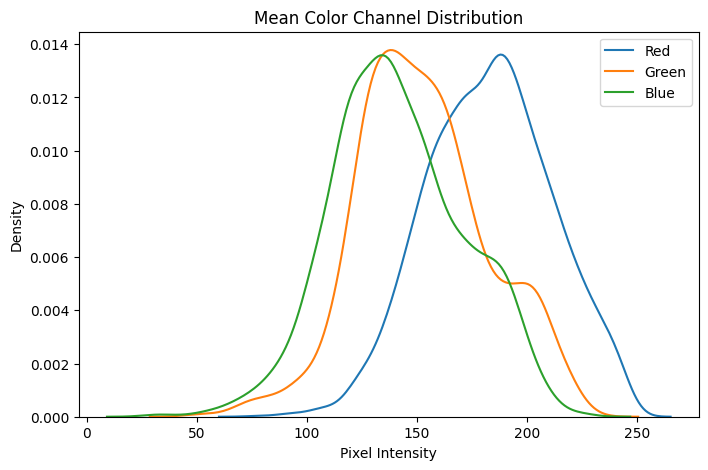

In [19]:
mean_r, mean_g, mean_b = [], [], []

for imgs in image_paths.values():
    for img_path in imgs[:1000]:  # sample first 1000 images for speed
        img = np.array(Image.open(img_path).convert("RGB"))
        mean_r.append(np.mean(img[:,:,0]))
        mean_g.append(np.mean(img[:,:,1]))
        mean_b.append(np.mean(img[:,:,2]))

plt.figure(figsize=(8,5))
sns.kdeplot(mean_r, label='Red')
sns.kdeplot(mean_g, label='Green')
sns.kdeplot(mean_b, label='Blue')
plt.title("Mean Color Channel Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.legend()
plt.show()


### Brightness & Contrast Distribution

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


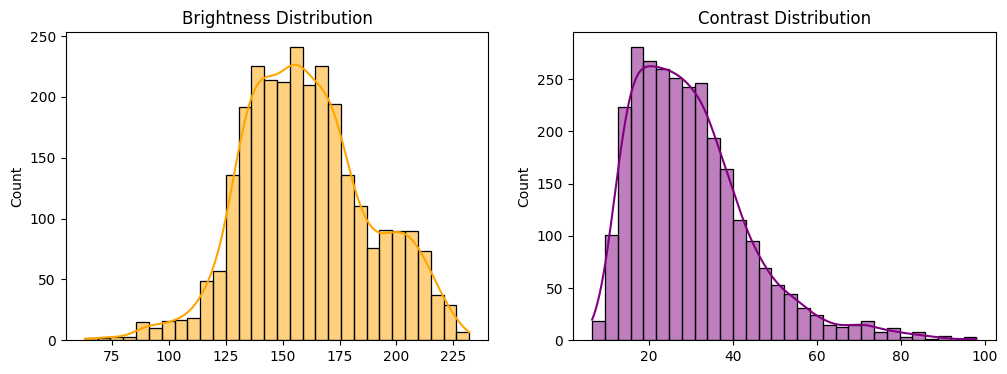

In [20]:
brightness, contrast = [], []

for imgs in image_paths.values():
    for img_path in imgs[:1000]:
        img = Image.open(img_path).convert("L")
        img_np = np.array(img)
        brightness.append(np.mean(img_np))
        contrast.append(np.std(img_np))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(brightness, bins=30, kde=True, color='orange')
plt.title("Brightness Distribution")
plt.subplot(1,2,2)
sns.histplot(contrast, bins=30, kde=True, color='purple')
plt.title("Contrast Distribution")
plt.show()


### Image Shape Heatmap (Optional Advanced Check)

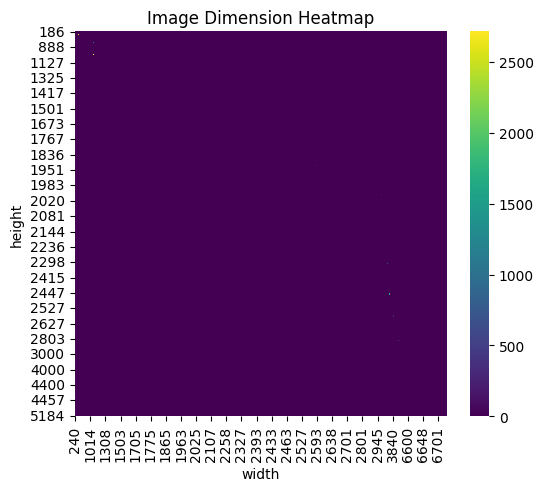

In [21]:
import pandas as pd

shape_df = pd.DataFrame({'width': widths, 'height': heights})
plt.figure(figsize=(6,5))
sns.heatmap(pd.crosstab(shape_df['height'], shape_df['width']), cmap='viridis')
plt.title("Image Dimension Heatmap")
plt.show()


### Class-wise Average Images

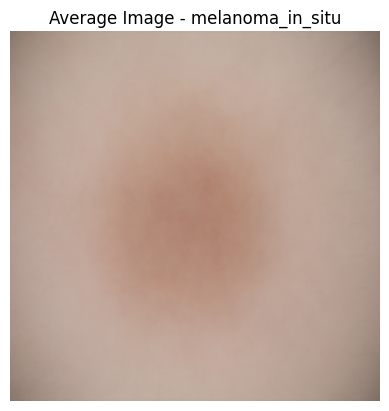

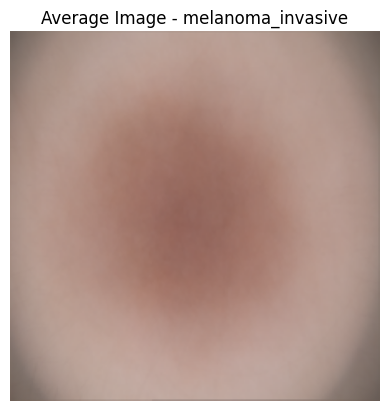

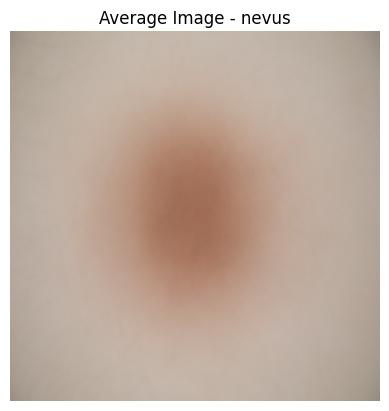

In [22]:
for cls, imgs in image_paths.items():
    avg_img = np.zeros((224,224,3))  # resize to 224x224 for averaging
    for img_path in imgs[:100]:  # sample 100 images
        img = Image.open(img_path).resize((224,224))
        avg_img += np.array(img)/100
    plt.imshow(avg_img.astype(np.uint8))
    plt.title(f"Average Image - {cls}")
    plt.axis('off')
    plt.show()


## Advanced EDA per class

In [23]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import random
from skimage.filters import sobel



# Setup & Collect Image Paths
base_path = Path(r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\cleaned_dataset")
classes = ["melanoma_in_situ", "melanoma_invasive", "nevus"]
image_paths = {cls: list((base_path/cls).glob("*")) for cls in classes}

# Print number of images per class
for cls in classes:
    print(f"{cls}: {len(image_paths[cls])} images")


C:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


melanoma_in_situ: 983 images
melanoma_invasive: 797 images
nevus: 9976 images


### Image Size, Aspect Ratio & Shape Stats

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


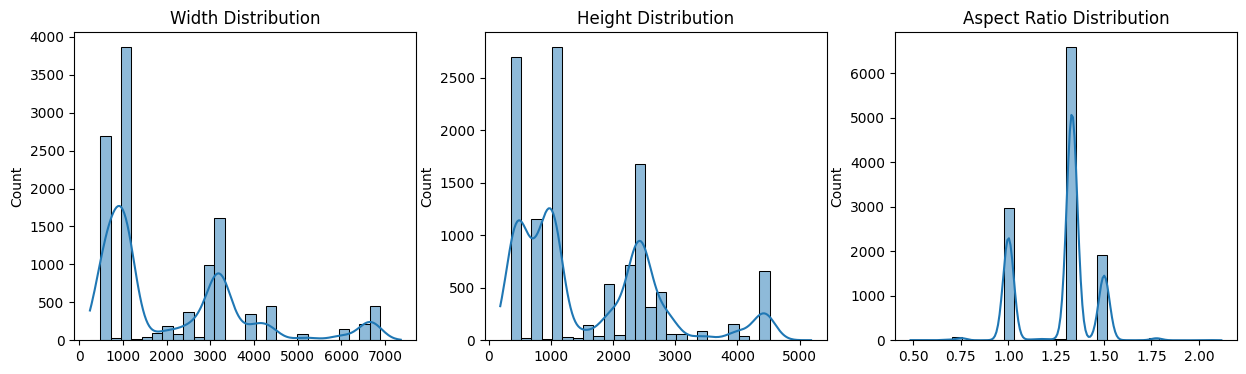

In [24]:
widths, heights, aspect_ratios = [], [], []

for cls in classes:
    for img_path in image_paths[cls]:
        img = Image.open(img_path)
        widths.append(img.width)
        heights.append(img.height)
        aspect_ratios.append(img.width/img.height)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(widths, bins=30, kde=True)
plt.title("Width Distribution")
plt.subplot(1,3,2)
sns.histplot(heights, bins=30, kde=True)
plt.title("Height Distribution")
plt.subplot(1,3,3)
sns.histplot(aspect_ratios, bins=30, kde=True)
plt.title("Aspect Ratio Distribution")
plt.show()


### Brightness & Contrast per Class

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


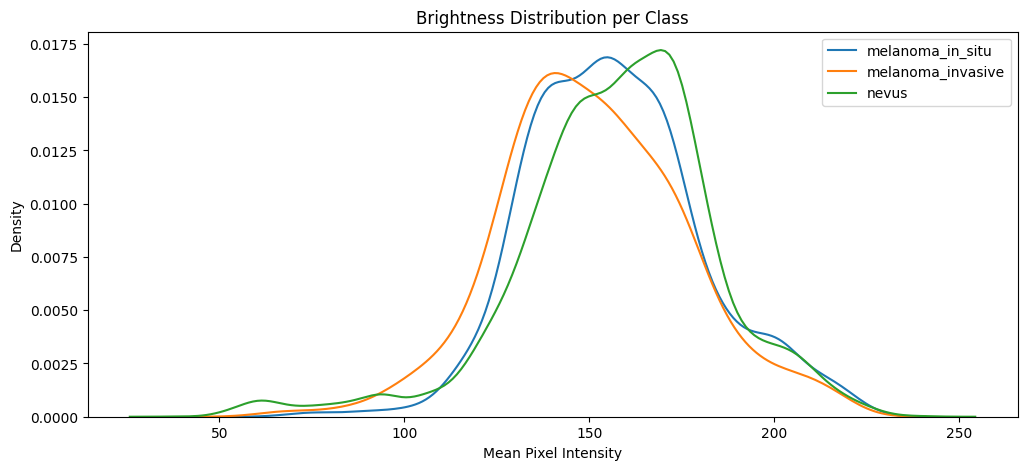

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


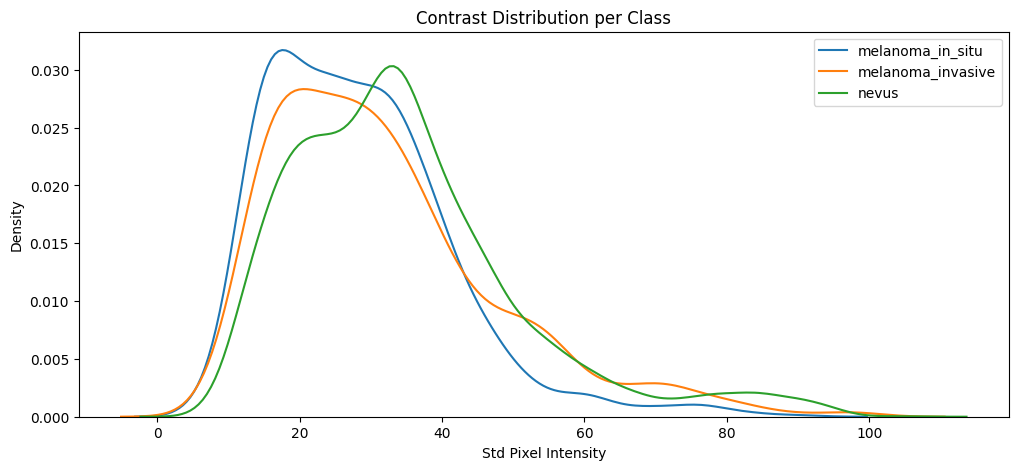

In [29]:
brightness_dict = {}
contrast_dict = {}

for cls in classes:
    b_vals, c_vals = [], []
    for img_path in image_paths[cls]:
        img = Image.open(img_path).convert("L")
        img_np = np.array(img)
        b_vals.append(np.mean(img_np))
        c_vals.append(np.std(img_np))
    brightness_dict[cls] = b_vals
    contrast_dict[cls] = c_vals

# Plot brightness
plt.figure(figsize=(12,5))
for cls in classes:
    sns.kdeplot(brightness_dict[cls], label=cls)
plt.title("Brightness Distribution per Class")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot contrast
plt.figure(figsize=(12,5))
for cls in classes:
    sns.kdeplot(contrast_dict[cls], label=cls)
plt.title("Contrast Distribution per Class")
plt.xlabel("Std Pixel Intensity")
plt.ylabel("Density")
plt.legend()
plt.show()


### Color Channel Analysis per Class

In [ ]:
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Initialize dictionary
color_dict = {cls: {'R':[], 'G':[], 'B':[]} for cls in classes}

# Sample a subset per class (optional, for speed)
sample_size = 200  # or adjust depending on memory

for cls in classes:
    sample_imgs = random.sample(image_paths[cls], min(len(image_paths[cls]), sample_size))
    for img_path in sample_imgs:
        img = Image.open(img_path).convert("RGB").resize((224,224))  # Resize to reduce memory
        img_np = np.array(img)
        color_dict[cls]['R'].append(np.mean(img_np[:,:,0]))
        color_dict[cls]['G'].append(np.mean(img_np[:,:,1]))
        color_dict[cls]['B'].append(np.mean(img_np[:,:,2]))

# Assign unique colors per class and channel
class_colors = {
    'melanoma_in_situ': {'R':'darkred', 'G':'darkgreen', 'B':'darkblue'},
    'melanoma_invasive': {'R':'red', 'G':'green', 'B':'blue'},
    'nevus': {'R':'orange', 'G':'lime', 'B':'cyan'}
}

# Plot
plt.figure(figsize=(12,6))
for cls in classes:
    sns.kdeplot(color_dict[cls]['R'], label=f'{cls} - R', color=class_colors[cls]['R'])
    sns.kdeplot(color_dict[cls]['G'], label=f'{cls} - G', color=class_colors[cls]['G'])
    sns.kdeplot(color_dict[cls]['B'], label=f'{cls} - B', color=class_colors[cls]['B'])

plt.title("RGB Mean Intensity per Class (Distinct Colors)")
plt.xlabel("Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.show()


########     Memory-Efficient Color Channel Analysis

# import numpy as np
# from PIL import Image
# import seaborn as sns
# import matplotlib.pyplot as plt
# import random

# # Initialize dictionary
# color_dict = {cls: {'R':[], 'G':[], 'B':[]} for cls in classes}

# # Sample a subset per class (optional, for speed)
# sample_size = 200  # or adjust depending on memory

# for cls in classes:
#     sample_imgs = random.sample(image_paths[cls], min(len(image_paths[cls]), sample_size))
#     for img_path in sample_imgs:
#         img = Image.open(img_path).convert("RGB").resize((224,224))  # Resize to reduce memory
#         img_np = np.array(img)
#         color_dict[cls]['R'].append(np.mean(img_np[:,:,0]))
#         color_dict[cls]['G'].append(np.mean(img_np[:,:,1]))
#         color_dict[cls]['B'].append(np.mean(img_np[:,:,2]))

# # Plot
# plt.figure(figsize=(12,5))
# for cls in classes:
#     sns.kdeplot(color_dict[cls]['R'], label=f'{cls} - R', color='red')
#     sns.kdeplot(color_dict[cls]['G'], label=f'{cls} - G', color='green')
#     sns.kdeplot(color_dict[cls]['B'], label=f'{cls} - B', color='blue')
# plt.title("RGB Mean Intensity per Class (Memory-Efficient)")
# plt.xlabel("Pixel Value")
# plt.ylabel("Density")
# plt.legend()
# plt.show()


### Edge/Texture Patterns per Class

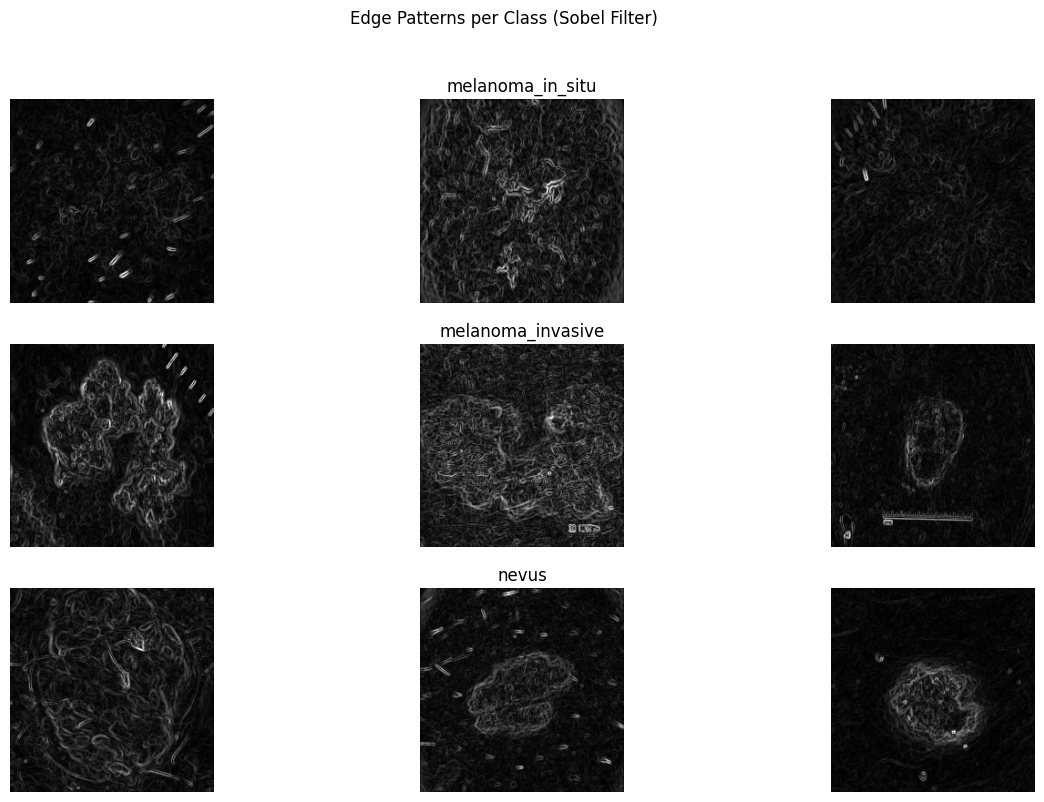

In [28]:
plt.figure(figsize=(15,9))
for i, cls in enumerate(classes):
    sample_imgs = random.sample(image_paths[cls], 3)
    for j, img_path in enumerate(sample_imgs):
        img = np.array(Image.open(img_path).convert("L").resize((224,224)))
        edge = sobel(img)
        plt.subplot(len(classes), 3, i*3 + j + 1)
        plt.imshow(edge, cmap='gray')
        if j==1:
            plt.title(cls)
        plt.axis('off')
plt.suptitle("Edge Patterns per Class (Sobel Filter)")
plt.show()


### Class-wise Average Images (Pattern Visualization)

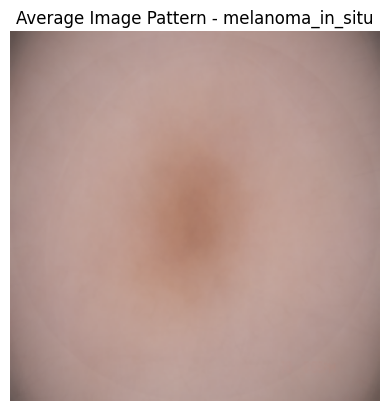

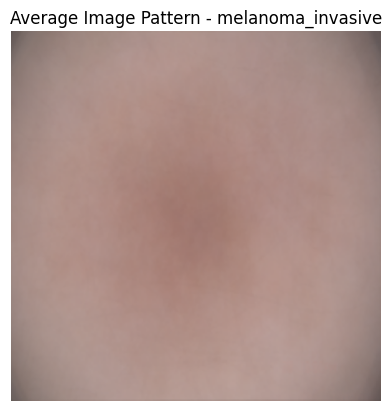

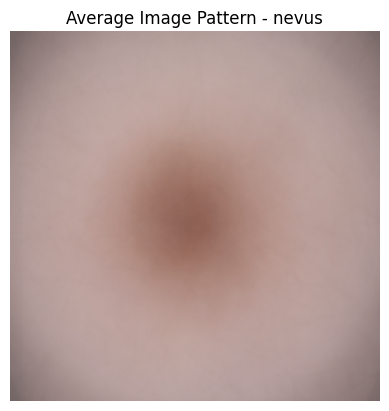

In [30]:
for cls in classes:
    avg_img = np.zeros((224,224,3))
    for img_path in random.sample(image_paths[cls], min(100,len(image_paths[cls]))):
        img = Image.open(img_path).resize((224,224))
        avg_img += np.array(img)/100
    plt.imshow(avg_img.astype(np.uint8))
    plt.title(f"Average Image Pattern - {cls}")
    plt.axis('off')
    plt.show()


### Pixel Intensity Heatmaps

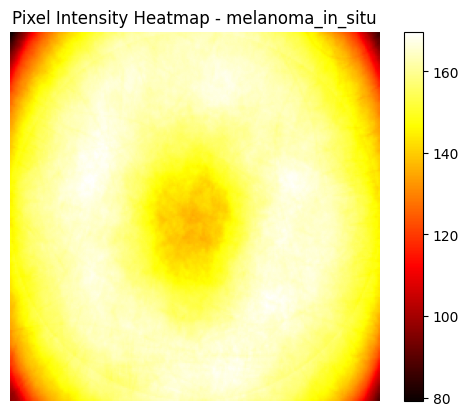

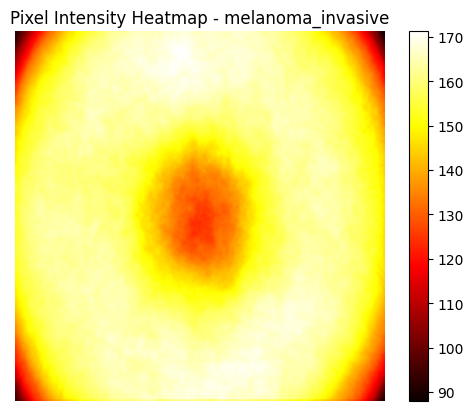

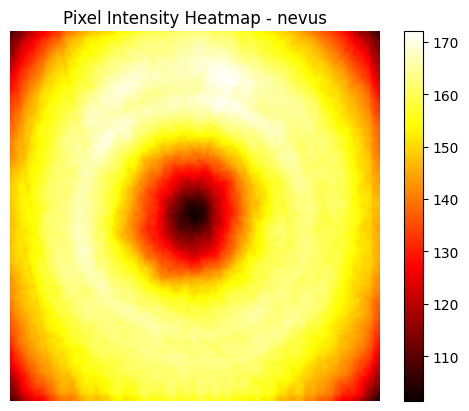

In [31]:
for cls in classes:
    acc_img = np.zeros((224,224))
    for img_path in random.sample(image_paths[cls], min(100,len(image_paths[cls]))):
        img = np.array(Image.open(img_path).convert("L").resize((224,224)))
        acc_img += img/100
    plt.imshow(acc_img, cmap='hot')
    plt.title(f"Pixel Intensity Heatmap - {cls}")
    plt.colorbar()
    plt.axis('off')
    plt.show()


### Summary Statistics per Class

In [36]:
for cls in classes:
    print(f"\nClass: {cls}")
    print(f"Image count: {len(image_paths[cls])}")
    print(f"Width: min {min([Image.open(p).width for p in image_paths[cls]])}, "
          f"max {max([Image.open(p).width for p in image_paths[cls]])}")
    print(f"Height: min {min([Image.open(p).height for p in image_paths[cls]])}, "
          f"max {max([Image.open(p).height for p in image_paths[cls]])}")
    print(f"Brightness: mean {np.mean(brightness_dict[cls]):.2f}, std {np.std(brightness_dict[cls]):.2f}")
    print(f"Contrast: mean {np.mean(contrast_dict[cls]):.2f}, std {np.std(contrast_dict[cls]):.2f}")



Class: melanoma_in_situ
Image count: 983
Width: min 640, max 6000
Height: min 480, max 4288
Brightness: mean 156.83, std 23.36
Contrast: mean 28.23, std 12.79

Class: melanoma_invasive
Image count: 797
Width: min 640, max 6668
Height: min 480, max 4479
Brightness: mean 150.94, std 25.13
Contrast: mean 31.95, std 15.94

Class: nevus
Image count: 9976
Width: min 240, max 7360
Height: min 186, max 5184
Brightness: mean 157.55, std 26.91
Contrast: mean 34.63, std 16.29


## Memory-Efficient Overall Pixel Intensity Distribution

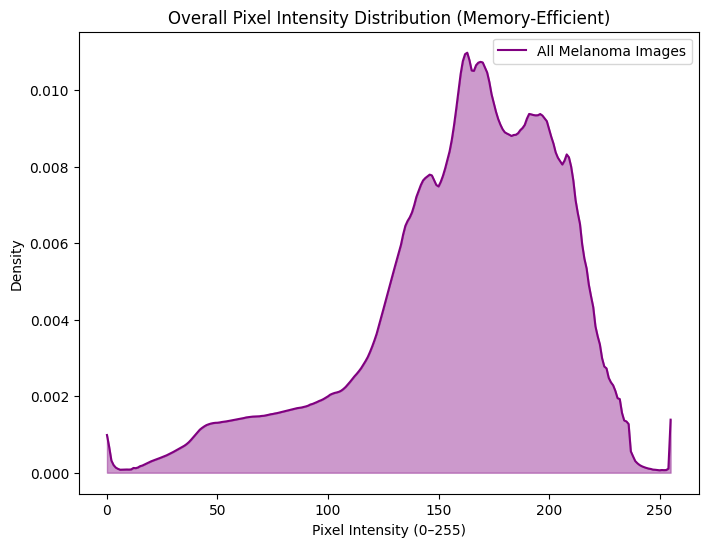

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# Function to compute histogram incrementally
def compute_overall_hist(file_list, n=200, bins=256):
    hist = np.zeros(bins, dtype=np.float64)
    sample_imgs = random.sample(file_list, min(len(file_list), n))
    
    for path in sample_imgs:
        img = Image.open(path).convert("L")  # grayscale
        arr = np.array(img).ravel()
        h, _ = np.histogram(arr, bins=bins, range=(0,255))
        hist += h
    
    hist = hist / hist.sum()  # normalize to get density
    return hist

# Compute histogram
hist = compute_overall_hist(all_images, n=200)

# Plot
plt.figure(figsize=(8,6))
plt.plot(range(256), hist, color='purple', label='All Melanoma Images')
plt.fill_between(range(256), hist, alpha=0.4, color='purple')
plt.title("Overall Pixel Intensity Distribution (Memory-Efficient)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Density")
plt.legend()
plt.show()


* separate histograms per class

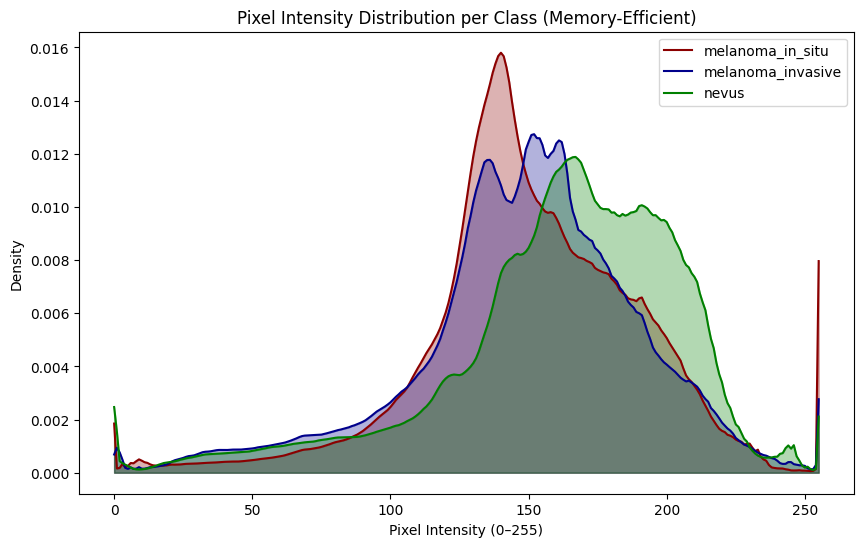

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# Function to compute histogram incrementally per class
def compute_class_hist(file_list, n=200, bins=256):
    hist = np.zeros(bins, dtype=np.float64)
    sample_imgs = random.sample(file_list, min(len(file_list), n))
    
    for path in sample_imgs:
        img = Image.open(path).convert("L")  # grayscale
        arr = np.array(img).ravel()
        h, _ = np.histogram(arr, bins=bins, range=(0,255))
        hist += h
    
    hist = hist / hist.sum()  # normalize to get density
    return hist

# Define colors per class for plotting
class_colors = {
    'melanoma_in_situ': 'darkred',
    'melanoma_invasive': 'darkblue',
    'nevus': 'green'
}

plt.figure(figsize=(10,6))

# Compute and plot per-class histograms
for cls in classes:
    hist = compute_class_hist(image_paths[cls], n=200)
    plt.plot(range(256), hist, color=class_colors[cls], label=cls)
    plt.fill_between(range(256), hist, alpha=0.3, color=class_colors[cls])

plt.title("Pixel Intensity Distribution per Class (Memory-Efficient)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Density")
plt.legend()
plt.show()


## Memory-Efficient Full-Resolution Analysis

In [44]:
def compute_avg_std_images_resized(file_list, target_size=(512,512)):
    count = 0
    avg_img = None
    sq_sum_img = None
    
    for path in file_list:
        img = Image.open(path).convert("RGB").resize(target_size)
        img_np = np.array(img, dtype=np.float32)
        
        if avg_img is None:  # initialize arrays
            avg_img = np.zeros_like(img_np)
            sq_sum_img = np.zeros_like(img_np)
        
        avg_img += img_np
        sq_sum_img += img_np**2
        count += 1

    mean_img = avg_img / count
    std_img = np.sqrt(sq_sum_img / count - avg_img**2 / count)
    
    return mean_img.astype(np.uint8), std_img.astype(np.uint8)


1. Visualize Average Images (Full-Resolution Patterns)

2. Visualize Standard Deviation Images (Pixel Variation / Texture)

In [46]:
avg_images = {}
std_images = {}

for cls in classes:
    print(f"Processing class: {cls} ({len(image_paths[cls])} images)")
    avg_img, std_img = compute_avg_std_images_resized(image_paths[cls], target_size=(512,512))
    avg_images[cls] = avg_img
    std_images[cls] = std_img


Processing class: melanoma_in_situ (983 images)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21880\2105869017.py:19: RuntimeWarning: invalid value encountered in sqrt
  std_img = np.sqrt(sq_sum_img / count - avg_img**2 / count)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21880\2105869017.py:21: RuntimeWarning: invalid value encountered in cast
  return mean_img.astype(np.uint8), std_img.astype(np.uint8)


Processing class: melanoma_invasive (797 images)
Processing class: nevus (9976 images)


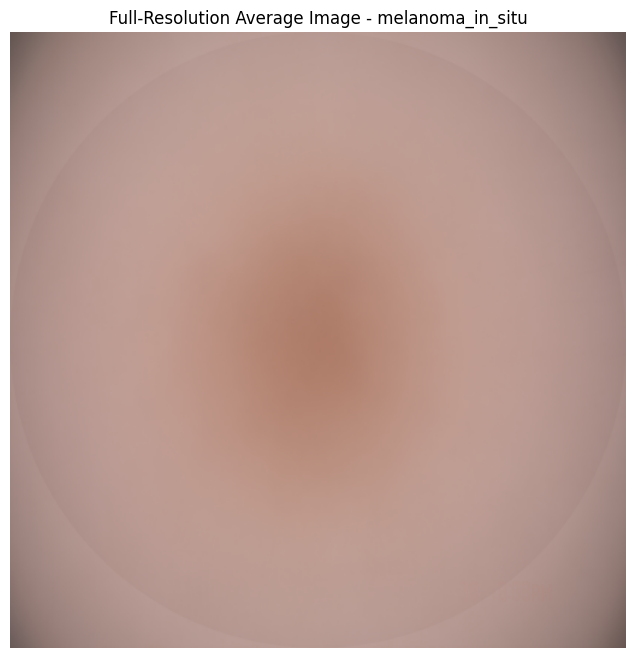

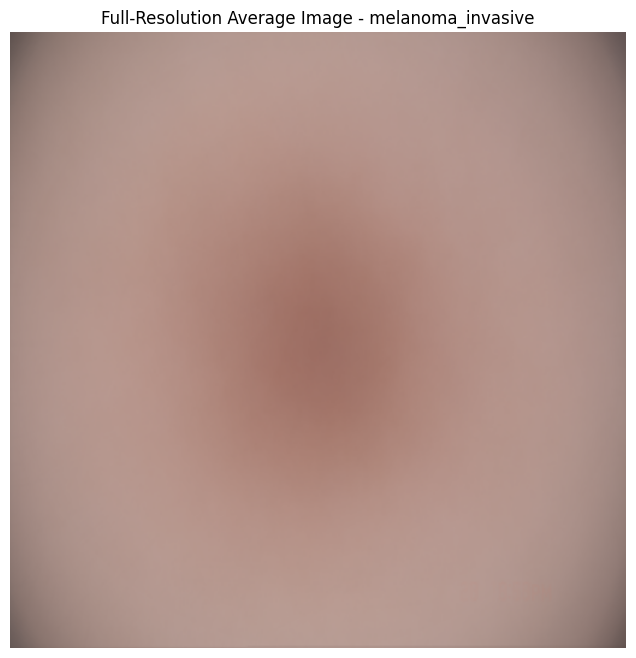

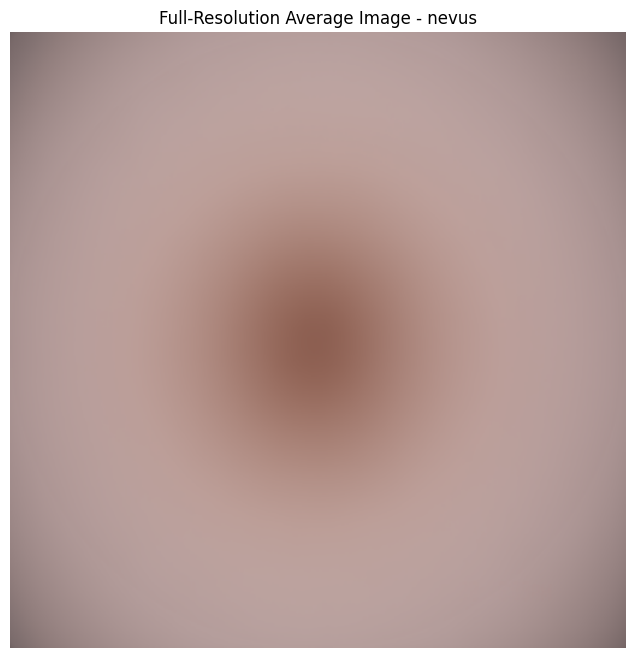

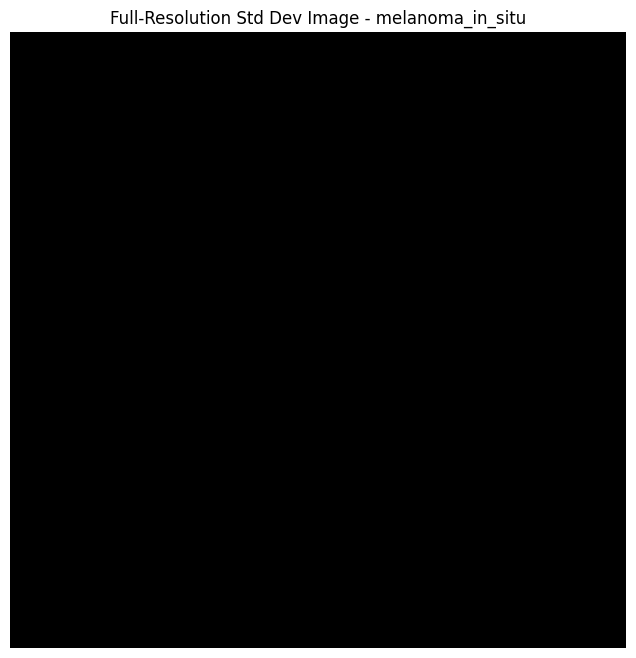

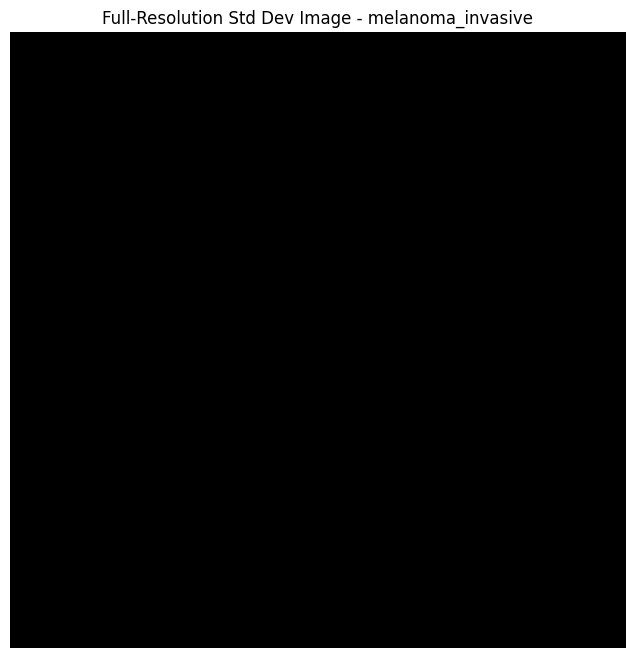

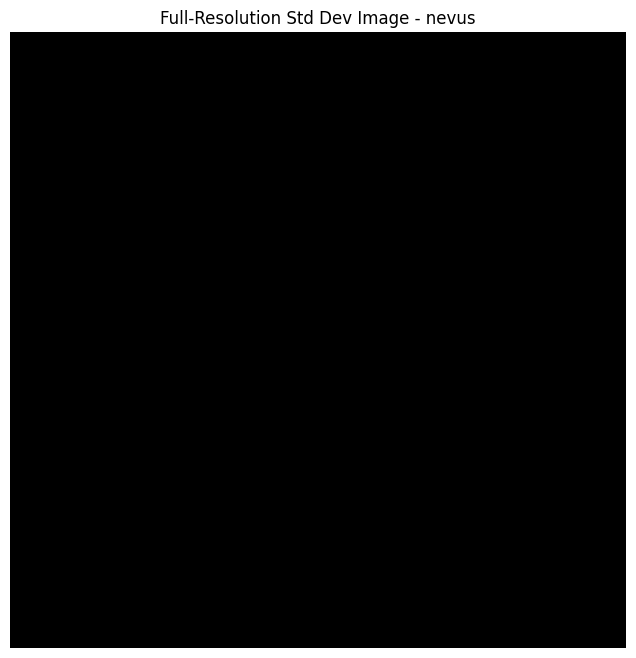

In [47]:
# Average Images
for cls in classes:
    plt.figure(figsize=(8,8))
    plt.imshow(avg_images[cls])
    plt.title(f"Full-Resolution Average Image - {cls}")
    plt.axis('off')
    plt.show()

# Std Dev Images
for cls in classes:
    plt.figure(figsize=(8,8))
    plt.imshow(std_images[cls])
    plt.title(f"Full-Resolution Std Dev Image - {cls}")
    plt.axis('off')
    plt.show()


# =================================================
# Exploratory Data Analysis (EDA) on Resized Images Dataset
# =================================================

In [42]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm


### Collect Image Paths and Labels

In [43]:
base_path = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\melanoma_resized_dataset version 03"

label_folders = {
    'melanoma_in_situ': os.path.join(base_path, "melanoma_in_situ"),
    'melanoma_invasive': os.path.join(base_path, "melanoma_invasive"),
    'nevus': os.path.join(base_path, "nevus")
}

data = []

for label, folder in label_folders.items():
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            data.append({
                'image_path': os.path.join(folder, file),
                'label': label
            })

df = pd.DataFrame(data)
print(df.head())
print(f"\nTotal Images: {len(df)}")


                                          image_path             label
0  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  melanoma_in_situ
1  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  melanoma_in_situ
2  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  melanoma_in_situ
3  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  melanoma_in_situ
4  C:\Users\lenovo\OneDrive\Desktop\Melanoma Dise...  melanoma_in_situ

Total Images: 10656


### Check for Duplicates

In [44]:
duplicate_count = df['image_path'].duplicated().sum()
print(f"Duplicate files found: {duplicate_count}")


Duplicate files found: 0


### Compute Class Weights

In [45]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(df['label'])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=df['label'])
class_weights = dict(zip(classes, weights))
print(class_weights)


{'melanoma_in_situ': 3.6134282807731433, 'melanoma_invasive': 4.456712672521958, 'nevus': 0.40018026137899954}


### Class Distribution

        This helps confirm if your dataset is balanced or skewed.

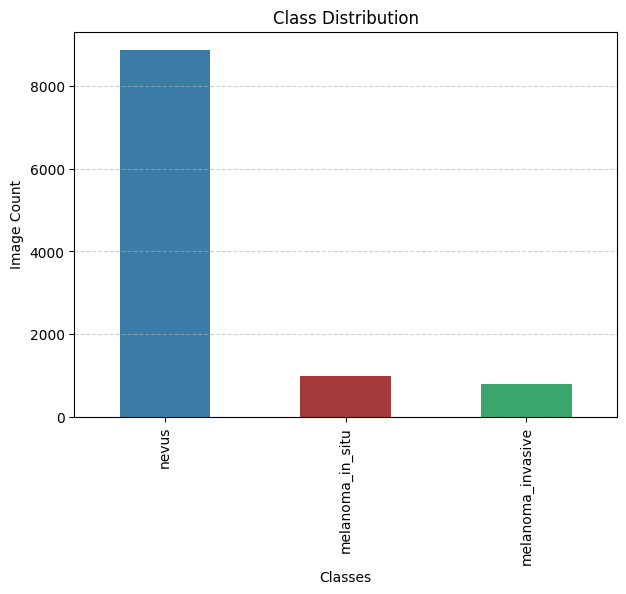

In [46]:
plt.figure(figsize=(7,5))
df['label'].value_counts().plot(kind='bar', color=['#3A7CA5', '#A53A3A', '#3AA56D'])
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Image Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [47]:
df['label'].value_counts()

label
nevus                8876
melanoma_in_situ      983
melanoma_invasive     797
Name: count, dtype: int64

### Show Random Sample Images from Each Class

        

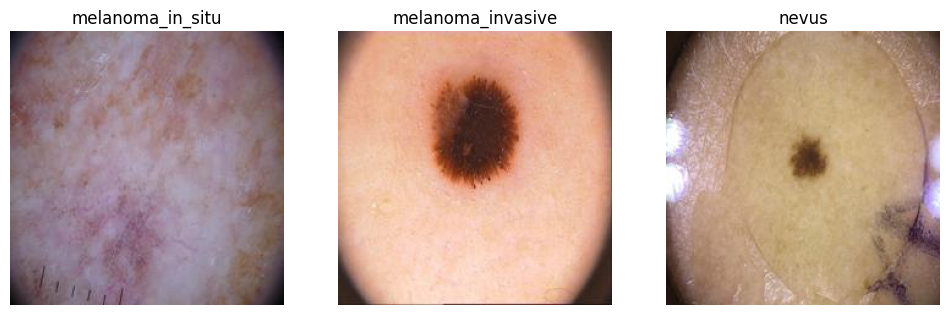

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, (label, subset) in zip(axes, df.groupby('label')):
    img_path = subset.sample(1)['image_path'].values[0]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
plt.show()


### Image Dimensions & Aspect Ratio Analysis

        This ensures all your images are uniformly resized and suitable for model input (e.g., 224x224).

100%|██████████████████████████████████████████████████████████████████████████| 10656/10656 [00:02<00:00, 5248.83it/s]


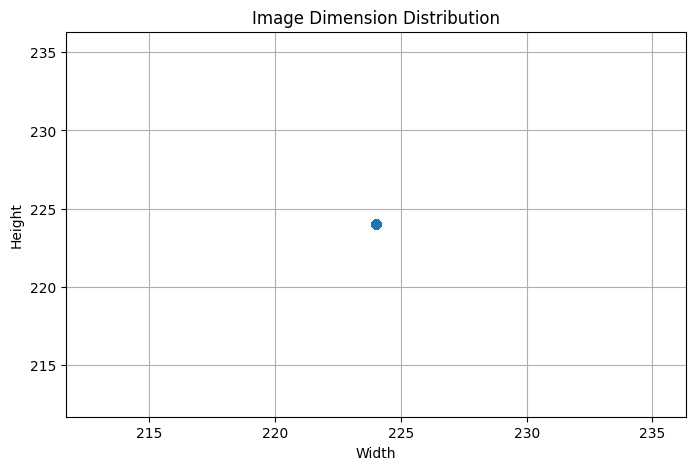

Unique image sizes: width  height
224    224       10656
Name: count, dtype: int64


In [49]:
dims = []
for path in tqdm(df['image_path']):
    img = Image.open(path)
    dims.append(img.size)  # (width, height)

df['width'], df['height'] = zip(*dims)

plt.figure(figsize=(8,5))
plt.scatter(df['width'], df['height'], alpha=0.3)
plt.title("Image Dimension Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()

print("Unique image sizes:", df[['width', 'height']].value_counts().head())


### Average Pixel Intensity (Grayscale Analysis)
        This helps detect contrast or lighting bias across classes.

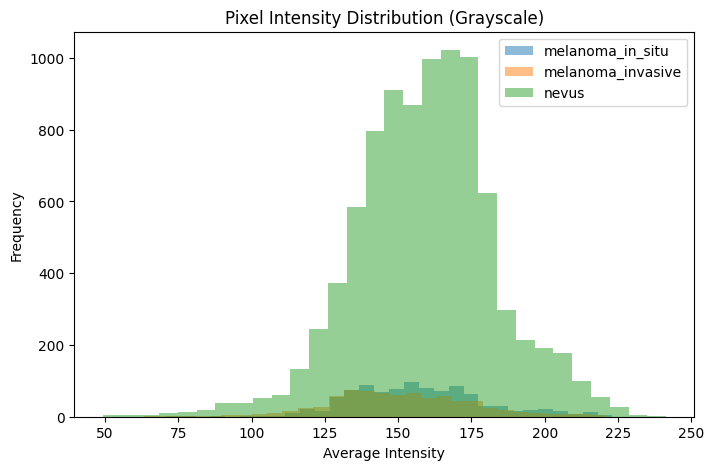

In [50]:
def avg_intensity(img_path):
    img = Image.open(img_path).convert("L")
    return np.mean(np.array(img))

df['avg_intensity'] = df['image_path'].apply(avg_intensity)

plt.figure(figsize=(8,5))
for cls in df['label'].unique():
    subset = df[df['label'] == cls]
    plt.hist(subset['avg_intensity'], bins=30, alpha=0.5, label=cls)
plt.legend()
plt.title("Pixel Intensity Distribution (Grayscale)")
plt.xlabel("Average Intensity")
plt.ylabel("Frequency")
plt.show()


### Color Channel Mean Analysis

        You’ll see if any color channel dominates (important in skin lesion images).

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 609.72it/s]


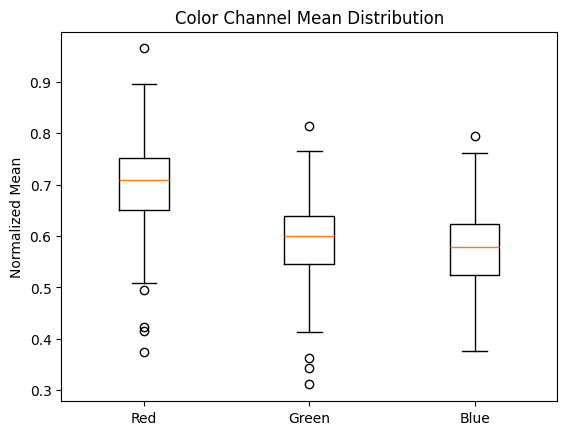

In [51]:
means = {'R': [], 'G': [], 'B': []}

for path in tqdm(df['image_path'].sample(100)):  # sample for speed
    img = np.array(Image.open(path).convert("RGB")) / 255.0
    means['R'].append(np.mean(img[:,:,0]))
    means['G'].append(np.mean(img[:,:,1]))
    means['B'].append(np.mean(img[:,:,2]))

plt.boxplot([means['R'], means['G'], means['B']], labels=['Red', 'Green', 'Blue'])
plt.title("Color Channel Mean Distribution")
plt.ylabel("Normalized Mean")
plt.show()


### Final Dataset Summary

In [52]:
print("=== Dataset Summary ===")
print(df.groupby('label').size())
print("\nImage shape consistency check:")
print(df[['width','height']].value_counts().head())
print("\nAverage brightness per class:")
print(df.groupby('label')['avg_intensity'].mean())


=== Dataset Summary ===
label
melanoma_in_situ      983
melanoma_invasive     797
nevus                8876
dtype: int64

Image shape consistency check:
width  height
224    224       10656
Name: count, dtype: int64

Average brightness per class:
label
melanoma_in_situ     156.815326
melanoma_invasive    150.936544
nevus                159.159157
Name: avg_intensity, dtype: float64


## Detect Duplicate Images & Remove them 

In [40]:
# import os
# from PIL import Image
# import imagehash
# from tqdm import tqdm

# # Define dataset path
# base_path = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\melanoma_resized_dataset version 03"

# # Classes (folders)
# classes = ['melanoma_in_situ', 'melanoma_invasive', 'nevus']

# # Store image hashes
# hash_dict = {}
# duplicates = []

# for cls in classes:
#     folder = os.path.join(base_path, cls)
#     print(f"🔍 Scanning {cls} ...")
#     for file in tqdm(os.listdir(folder)):
#         if file.lower().endswith(('.png', '.jpg', '.jpeg')):
#             filepath = os.path.join(folder, file)
#             try:
#                 img = Image.open(filepath).convert("RGB")
#                 img_hash = imagehash.average_hash(img)  # You can also try phash() or dhash()

#                 if img_hash in hash_dict:
#                     duplicates.append((filepath, hash_dict[img_hash]))
#                 else:
#                     hash_dict[img_hash] = filepath

#             except Exception as e:
#                 print(f"Error reading {file}: {e}")

# print(f"\nTotal duplicates found: {len(duplicates)}")
# for dup in duplicates[:10]:
#     print(f"Duplicate Pair:\n{dup[0]}\n{dup[1]}\n")


In [39]:
# from matplotlib import pyplot as plt

# for dup in duplicates[:3]:
#     fig, axes = plt.subplots(1, 2, figsize=(6, 3))
#     for ax, path in zip(axes, dup):
#         ax.imshow(Image.open(path))
#         ax.set_title(os.path.basename(path))
#         ax.axis('off')
#     plt.show()


In [38]:
# from PIL import Image
# import matplotlib.pyplot as plt

# for dup in duplicates[:5]:
#     fig, axes = plt.subplots(1, 2, figsize=(6, 3))
#     for ax, path in zip(axes, dup):
#         ax.imshow(Image.open(path))
#         ax.set_title(os.path.basename(path))
#         ax.axis('off')
#     plt.show()


In [53]:
from collections import defaultdict

hash_dict = {}
duplicates = defaultdict(list)

for cls in classes:
    folder = os.path.join(base_path, cls)
    print(f"🔍 Scanning {cls} ...")
    for file in tqdm(os.listdir(folder)):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            filepath = os.path.join(folder, file)
            try:
                img = Image.open(filepath).convert("RGB")
                img_hash = imagehash.average_hash(img)

                if img_hash in hash_dict:
                    prev_path, prev_cls = hash_dict[img_hash]
                    duplicates[(cls, prev_cls)].append((filepath, prev_path))
                else:
                    hash_dict[img_hash] = (filepath, cls)

            except Exception as e:
                print(f"Error reading {file}: {e}")

print("\n=== Duplicate Summary ===")
for (cls1, cls2), pairs in duplicates.items():
    print(f"{cls1} ↔ {cls2}: {len(pairs)} duplicates")


🔍 Scanning melanoma_in_situ ...


100%|███████████████████████████████████████████████████████████████████████████████| 983/983 [00:00<00:00, 985.54it/s]


🔍 Scanning melanoma_invasive ...


100%|███████████████████████████████████████████████████████████████████████████████| 797/797 [00:00<00:00, 970.72it/s]


🔍 Scanning nevus ...


100%|█████████████████████████████████████████████████████████████████████████████| 8876/8876 [00:09<00:00, 982.34it/s]


=== Duplicate Summary ===
melanoma_in_situ ↔ melanoma_in_situ: 31 duplicates
melanoma_invasive ↔ melanoma_in_situ: 5 duplicates
melanoma_invasive ↔ melanoma_invasive: 47 duplicates


In [54]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicates(duplicates_dict, max_pairs=10):
    """
    Displays duplicate image pairs for visual verification.
    """
    pair_count = 0
    for (cls1, cls2), pairs in duplicates_dict.items():
        print(f"\n🔍 Showing {len(pairs)} duplicates between {cls1} and {cls2}")
        for path1, path2 in pairs[:max_pairs]:
            img1 = Image.open(path1)
            img2 = Image.open(path2)

            fig, axes = plt.subplots(1, 2, figsize=(8, 4))
            axes[0].imshow(img1)
            axes[0].set_title(f"{cls1}\n{os.path.basename(path1)}")
            axes[0].axis('off')

            axes[1].imshow(img2)
            axes[1].set_title(f"{cls2}\n{os.path.basename(path2)}")
            axes[1].axis('off')

            plt.tight_layout()
            plt.show()

            pair_count += 1
            if pair_count >= max_pairs:
                break



🔍 Showing 31 duplicates between melanoma_in_situ and melanoma_in_situ


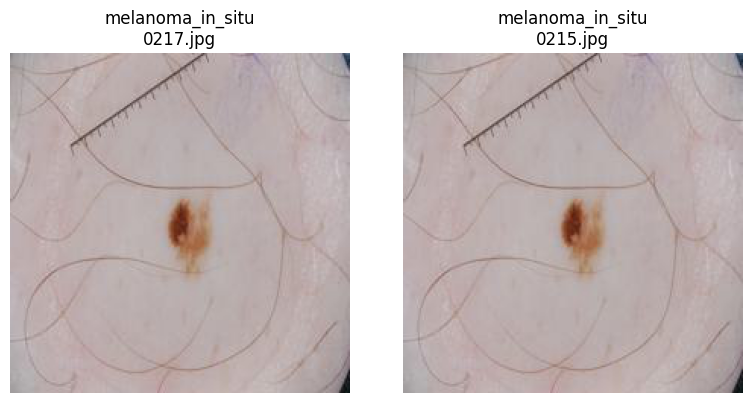

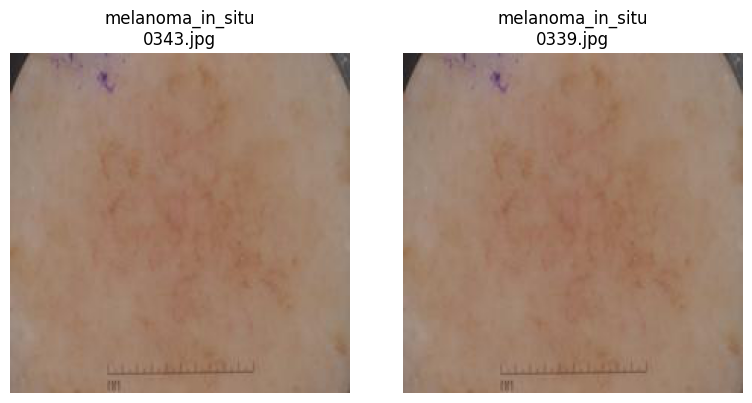

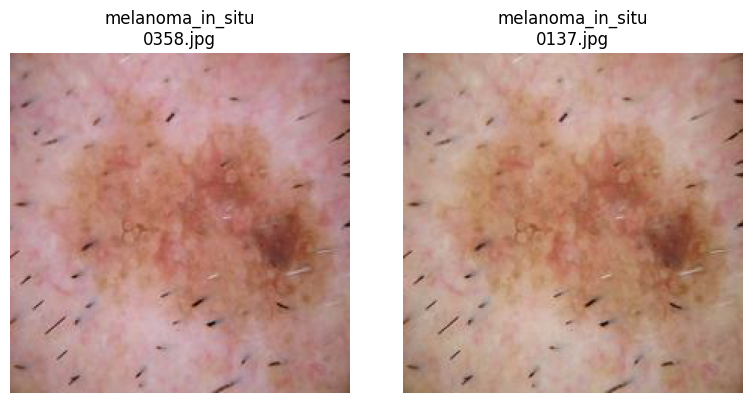

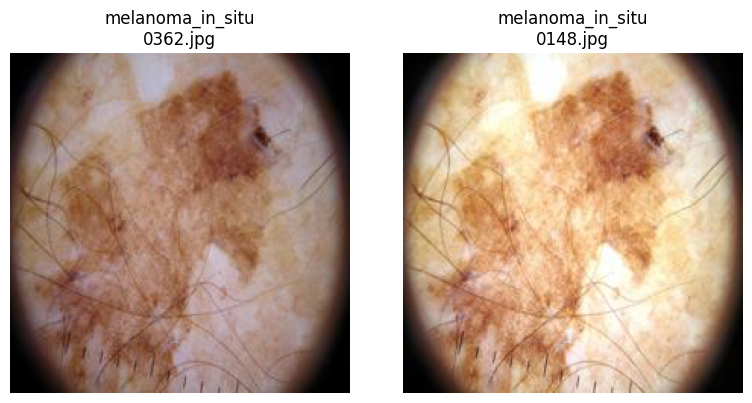

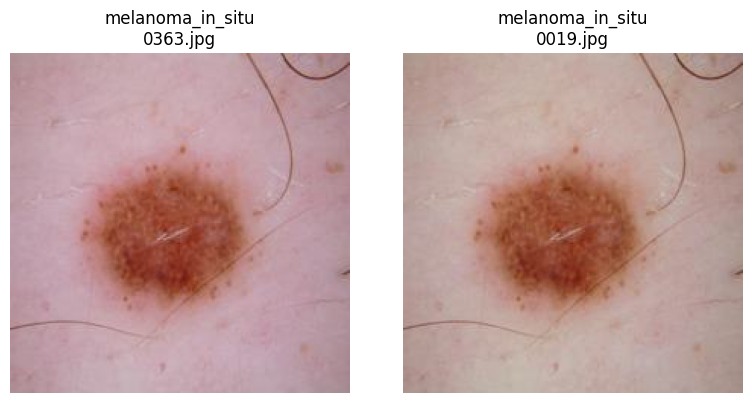

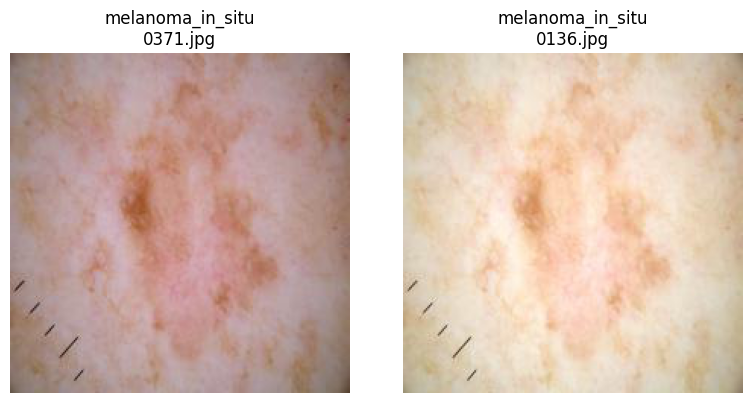

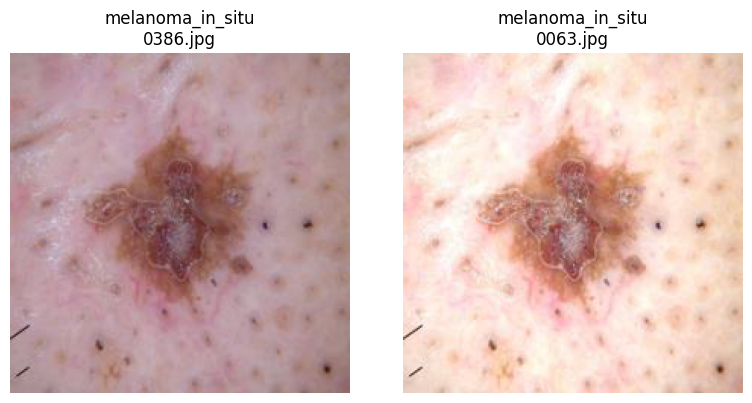


🔍 Showing 5 duplicates between melanoma_invasive and melanoma_in_situ


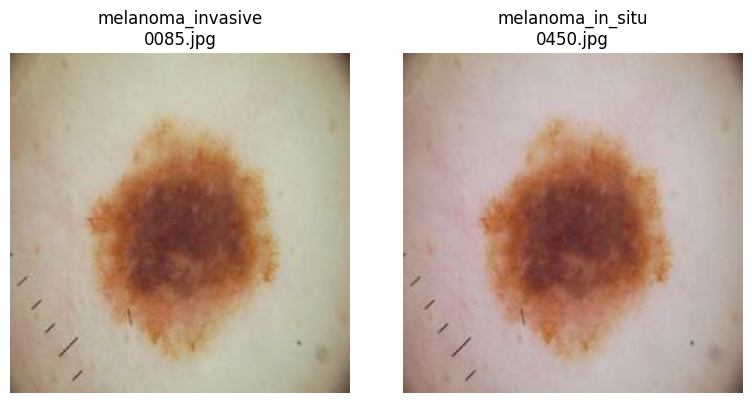


🔍 Showing 47 duplicates between melanoma_invasive and melanoma_invasive


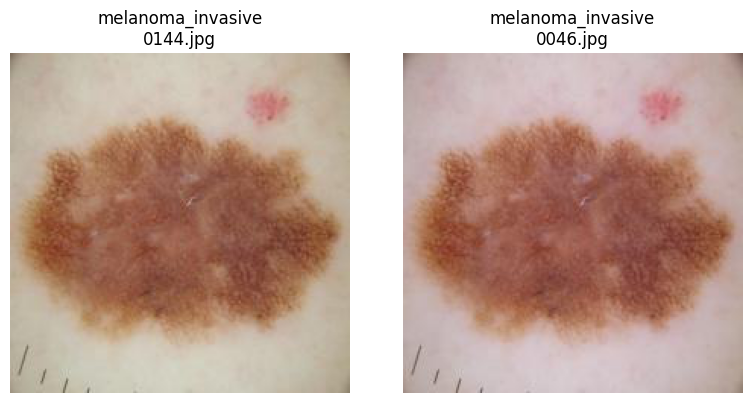

In [56]:
show_duplicates(duplicates, max_pairs=7)


#### Show duplicated from `Nevus Class` only

In [57]:
# Filter duplicates for nevus ↔ nevus only
nevus_duplicates = {k: v for k, v in duplicates.items() if k == ('nevus', 'nevus')}

# Show few examples visually
show_duplicates(nevus_duplicates, max_pairs=40)


### Remove Duplicates from Nevus Class 

   **Objective:**

    You want to purge the nevus folder so that:

    Any duplicate pair within nevus ↔ nevus → ❌ remove both images.

    Any nevus image that is duplicated with any other class (melanoma_in_situ or melanoma_invasive) → ❌ remove the nevus side of that pair only.

    Absolutely no modification to melanoma_in_situ or melanoma_invasive folders.

    We’ll not overwrite anything from other 2 classes; we’ll safely delete the unwanted nevus images only.

In [37]:
# import os
# import shutil

# # 🔒 Safety backup folder (optional but highly recommended)
# backup_dir = r"C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\nevus_duplicates_backup"
# os.makedirs(backup_dir, exist_ok=True)

# # Collect all nevus images to delete
# nevus_to_delete = set()

# for (cls1, cls2), pairs in duplicates.items():
#     for path1, path2 in pairs:
#         # Case 1: both are nevus -> remove both
#         if cls1 == cls2 == "nevus":
#             nevus_to_delete.update([path1, path2])

#         # Case 2: nevus vs melanoma_in_situ or melanoma_invasive
#         elif cls1 == "nevus" and cls2 in ["melanoma_in_situ", "melanoma_invasive"]:
#             nevus_to_delete.add(path1)
#         elif cls2 == "nevus" and cls1 in ["melanoma_in_situ", "melanoma_invasive"]:
#             nevus_to_delete.add(path2)

# # Double-check before deletion
# print(f"🧾 Total nevus images to delete: {len(nevus_to_delete)}")

# # Backup and delete
# for img_path in nevus_to_delete:
#     try:
#         if os.path.exists(img_path):
#             shutil.copy(img_path, backup_dir)  # backup
#             os.remove(img_path)  # delete
#     except Exception as e:
#         print(f"⚠️ Error removing {img_path}: {e}")

# print("✅ All duplicate nevus images removed safely.")
# print(f"🗂️ Backup stored in: {backup_dir}")


🧾 Total nevus images to delete: 1100
✅ All duplicate nevus images removed safely.
🗂️ Backup stored in: C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\nevus_duplicates_backup


---

🧾 Total nevus images to delete: 1100

✅ All duplicate nevus images removed safely.

🗂️ Backup stored in: C:\Users\lenovo\OneDrive\Desktop\Melanoma Disease Classification\nevus_duplicates_backup